# PGA, PGV Calculation 
# RotD50, RotD100

### <font color='red'>- The details are in the Boore's paper (2010BSSA)
</font> 

#### Import the modules used in this program

In [1]:
from obspy.core import read
from obspy.core.trace import Trace
from obspy.signal.rotate import rotate_ne_rt
import matplotlib.pyplot as plt
import numpy as np

#### Read the files from "list.txt"

#### For each station:

#### accEW, accNS, velEW, velNS

In [ ]:
data_accEW = read(file_accEW)
data_accNS = read(file_accNS)
data_velEW = read(file_velEW)
data_velNS = read(file_velNS)

#### Data processing

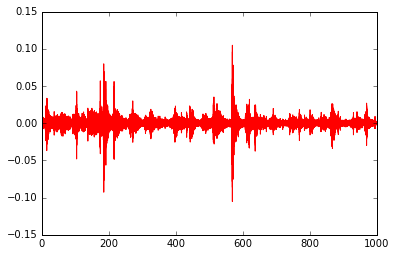

In [95]:
#Creating time window
dt = data_accEW[0].stats.sac.delta
Num = data_accEW[0].stats.npts
x = np.linspace(0,Num*dt,Num)

#Plot the whole waveform
plt.plot(x,data_accNS[0].data, 'r-')
#plt.xlim(180, 240)
plt.show()


### <font color='red'>- Cutting time window from a to f
</font> 


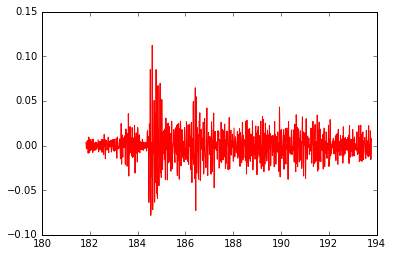

In [151]:
#Retrieving start and end time
beg = data_accEW[0].stats.sac.a
end = data_accEW[0].stats.sac.f

#Define the cut window function
def cut_window(array, dt, beg, end):
    temp = Trace(data=array)
    temp.stats.delta = dt
    t0 = temp.stats.starttime
    temp.trim(t0 + beg, t0 + end)
    out = temp.data
    return out

t = cut_window(x, dt, beg, end)
accEW = cut_window(data_accEW[0].data, dt, beg, end)
accNS = cut_window(data_accNS[0].data, dt, beg, end)
velEW = cut_window(data_velEW[0].data, dt, beg, end)
velNS = cut_window(data_velNS[0].data, dt, beg, end)

plt.plot(t,accEW, 'r-')
plt.show()

### <font color='red'>- Rotating
</font> 
(Radial, Transverse) = rotate_ne_rt(n, e, ba)
from NS and EW to Radial and Transverse

n: NS,e: EW, ba: Back Azimuth

rotation-angle periodicity of 180 deg

#### Notice!!
<font color='red'>
Basically it's good to use numpy module, if you calculate with array.

But you have to prepare the empty array, when you use it.
</font> 

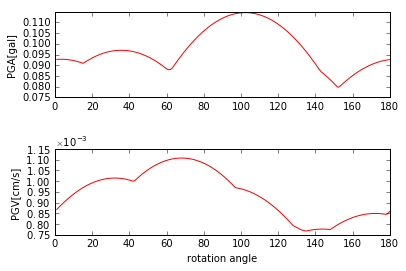

0.0951952785254 0.114531926811 0.000957446027314 0.00110763229895


In [173]:
#Preparing the array
max_acc = np.array([0.0]*180)
max_vel = np.array([0.0]*180)
#for integer array
#max_acc = np.array([0]*180)


#Calculating Peak Amplitude over the whole rotation angles
for i in range(0, 180):
    (rad, trans) = rotate_ne_rt(accNS, accEW, i)
    ab_rad = abs(rad) 
    max_acc[i] = np.max(ab_rad)

for i in range(0, 180):
    (rad, trans) = rotate_ne_rt(velNS, velEW, i)
    ab_rad = abs(rad) 
    max_vel[i] = np.max(ab_rad)
    
ang = np.linspace(1,180,180)

plt.subplots_adjust(wspace=0.4, hspace=0.6) #グラフ間の余白を調整
plt.subplot(2,1,1)
plt.plot(ang,max_acc, 'r-')
plt.ylabel('PGA[gal]')

ax = plt.subplot(2,1,2)
plt.plot(ang,max_vel, 'r-')
plt.ylabel('PGV[cm/s]')
plt.xlabel('rotation angle')

#y-axisの表記を指数に変更
import matplotlib.ticker as ptick
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style='sci',axis='y',scilimits=(0,0))

plt.show()

#Pickup the maximum (RotD100) and median (RotD50) values
RotD50_PGA = np.median(max_acc)
RotD100_PGA = np.max(max_acc)
RotD50_PGV = np.median(max_vel)
RotD100_PGV = np.max(max_vel)

print(RotD50_PGA, RotD100_PGA, RotD50_PGV, RotD100_PGV)

